<a href="https://colab.research.google.com/github/HungVLe/CMPE255/blob/main/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write one or more colabs to demonstrate gradient boost methods with proper results visualizations

 

a) Showcase  gbm classifier techniques

 

XGBoost, Catboost, LightGBM, randomforest, adaboost, decision tree classifier in the colab hint: 
https://docs.google.com/presentation/d/19j3wC-8_cz41CIm88F6kOFU8ys7zVcRfaBw6SImAeWc/edit#slide=id.ga2af525914_0_5665

b) Showcase gradient boost regression techniques XGBoost, Catboost, LightGBM

c) showcase gradient boost ranking techniques XGBoost, Catboost, LightGBM

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
)

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import logging
logging.getLogger("XGBClassifier").setLevel(logging.CRITICAL)
logging.getLogger("LGBMClassifier").setLevel(logging.CRITICAL)
logging.getLogger("CatBoostClassifier").setLevel(logging.CRITICAL)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Showcase gbm classifier techniques**

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=12, random_state=1234)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500, max_features=0.06, n_jobs=6, random_state=1234
)

# Adaboost
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)
ab = AdaBoostClassifier(
    base_estimator=base_estim, n_estimators=500, learning_rate=0.5, random_state=1234
)

# Gradient Boosted Decision Trees (Scikit-Learn)
gbm = GradientBoostingClassifier(
    n_estimators=2000,
    subsample=0.67,
    max_features=0.06,
    validation_fraction=0.1,
    n_iter_no_change=15,
    verbose=0,
    random_state=1234,
)

# XGBoost
xgb = XGBClassifier(
    n_estimators=2000,
    tree_method="hist",
    subsample=0.67,
    colsample_level=0.06,
    verbose=0,
    n_jobs=6,
    random_state=1234,
)

# LightGBM
lgbm = LGBMClassifier(
    n_estimators=2000,
    feature_fraction=0.06,
    bagging_fraction=0.67,
    bagging_freq=1,
    verbose=0,
    n_jobs=6,
    random_state=1234,
)

# CatBoost
cb = CatBoostClassifier(n_estimators=2000,
                           colsample_bylevel=0.06,
                           max_leaves=31,
                           subsample=0.67,
                           verbose=0,
                           thread_count=6,
                           random_state=1234)

# Histogram-based Gradient Boosting Machine (Scikit-Learn)
hgbm = HistGradientBoostingClassifier(
    max_iter=2000,
    validation_fraction=0.1,
    n_iter_no_change=15,
    verbose=0,
    random_state=1234,
)

In [ ]:
models = [dt, rf, ab, gbm, hgbm, xgb, lgbm, cb]
model_names = [i.__class__.__name__ for i in models]

In [ ]:
df_results = pd.DataFrame(columns=['accuracy', 'run_time'])

for m, n in zip(models, model_names):
    start_time = time()
    m.fit(X_train, y_train)
    run_time = time() - start_time
    preds = m.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    df_results.loc[n] = [accuracy, run_time]
    del m

<AxesSubplot:>

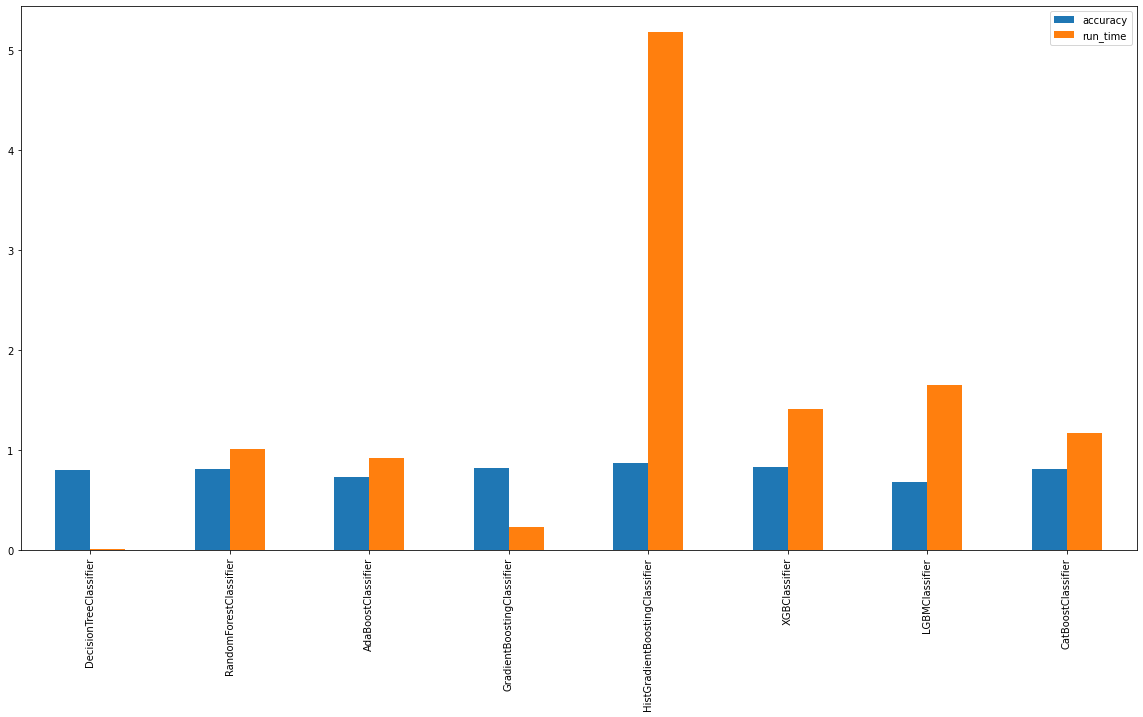

In [ ]:
df_results.plot(kind='bar', figsize=(20, 10))

# **Showcase gradient boost regression techniques XGBoost, Catboost, LightGBM**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.metrics import max_error

In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
cb_rg = CatBoostRegressor(verbose=0, n_estimators=100)
lgbm_rg = LGBMRegressor()
xgb_rg = XGBRegressor(objective='reg:squarederror')

In [ ]:
models = [cb_rg, lgbm_rg, xgb_rg]
model_names = [i.__class__.__name__ for i in models]

In [ ]:
df_results = pd.DataFrame(columns=['max_error', 'run_time'])

for m, n in zip(models, model_names):
    start_time = time()
    m.fit(X_train, y_train)
    run_time = time() - start_time
    preds = m.predict(X_test)
    mr = max_error(y_test, preds)
    df_results.loc[n] = [mr, run_time]
    del m

max_error


<AxesSubplot:>

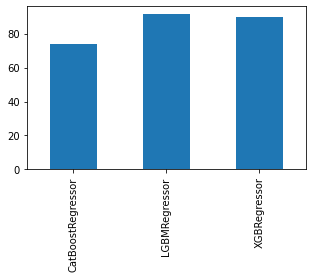

In [ ]:
print('max_error')
df_results['max_error'].plot(kind='bar', figsize=(5, 3))

run_time


<AxesSubplot:>

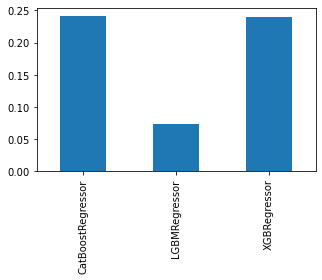

In [ ]:
print('run_time')
df_results['run_time'].plot(kind='bar', figsize=(5, 3))